Resolveremos el problema resuelto utilizando un elemento cúbico

Las funciones de forma son, según vimos:

$$N_1^{(e)}(x) = \left(1 - \dfrac {3x} {h^{(e)}} \right) \left(1 - \dfrac {3x} {2h^{(e)}} \right) \left(1 - \dfrac {x} {h^{(e)}} \right)$$

$$N_2^{(e)}(x) = \dfrac {9x} {h^{(e)}}  \left(1 - \dfrac {3x} {2h^{(e)}} \right) \left(1 - \dfrac {x} {h^{(e)}} \right)$$

$$N_3^{(e)}(x) = - \dfrac {9x} {2h^{(e)}}  \left(1 - \dfrac {3x} {h^{(e)}} \right) \left(1 - \dfrac {x} {h^{(e)}} \right)$$

$$N_4^{(e)}(x) = \dfrac {x} {h^{(e)}}  \left(1 - \dfrac {3x} {h^{(e)}} \right) \left(1 - \dfrac {3x} {2h^{(e)}} \right)$$

In [1]:
import sympy as sp
import numpy as np

In [2]:
L, x, q = sp.symbols('L, x, q')
T_1, T_2, T_3, T_4 = sp.symbols('T_1, T_2, T_3, T_4')

In [3]:
T = sp.Matrix([T_1, T_2, T_3, T_4])

In [4]:
N_1 = (1-3*x/L) * (1-3*x/(2*L)) * (1-x/L)
N_2 = 9*x/L * (1-3*x/(2*L)) * (1-x/L)
N_3 = -9*x/(2*L) * (1-3*x/L) * (1-x/L)
N_4 = x/L*(1-3*x/L) * (1-3*x/(2*L)) 
N_1

(1 - 3*x/L)*(1 - 3*x/(2*L))*(1 - x/L)

In [5]:
dN_1 = sp.diff(N_1,x).expand()
dN_2 = sp.diff(N_2,x).expand()
dN_3 = sp.diff(N_3,x).expand()
dN_4 = sp.diff(N_4,x).expand()
dN_1

-11/(2*L) + 18*x/L**2 - 27*x**2/(2*L**3)

In [6]:
v = sp.Matrix([dN_1, dN_2, dN_3, dN_4])
v

Matrix([
[-11/(2*L) + 18*x/L**2 - 27*x**2/(2*L**3)],
[      9/L - 45*x/L**2 + 81*x**2/(2*L**3)],
[ -9/(2*L) + 36*x/L**2 - 81*x**2/(2*L**3)],
[       1/L - 9*x/L**2 + 27*x**2/(2*L**3)]])

In [7]:
vv = v * v.T
vv

Matrix([
[                                       (-11/(2*L) + 18*x/L**2 - 27*x**2/(2*L**3))**2, (-11/(2*L) + 18*x/L**2 - 27*x**2/(2*L**3))*(9/L - 45*x/L**2 + 81*x**2/(2*L**3)), (-11/(2*L) + 18*x/L**2 - 27*x**2/(2*L**3))*(-9/(2*L) + 36*x/L**2 - 81*x**2/(2*L**3)), (-11/(2*L) + 18*x/L**2 - 27*x**2/(2*L**3))*(1/L - 9*x/L**2 + 27*x**2/(2*L**3))],
[     (-11/(2*L) + 18*x/L**2 - 27*x**2/(2*L**3))*(9/L - 45*x/L**2 + 81*x**2/(2*L**3)),                                         (9/L - 45*x/L**2 + 81*x**2/(2*L**3))**2,       (-9/(2*L) + 36*x/L**2 - 81*x**2/(2*L**3))*(9/L - 45*x/L**2 + 81*x**2/(2*L**3)),       (1/L - 9*x/L**2 + 27*x**2/(2*L**3))*(9/L - 45*x/L**2 + 81*x**2/(2*L**3))],
[(-11/(2*L) + 18*x/L**2 - 27*x**2/(2*L**3))*(-9/(2*L) + 36*x/L**2 - 81*x**2/(2*L**3)),  (-9/(2*L) + 36*x/L**2 - 81*x**2/(2*L**3))*(9/L - 45*x/L**2 + 81*x**2/(2*L**3)),                                         (-9/(2*L) + 36*x/L**2 - 81*x**2/(2*L**3))**2,  (-9/(2*L) + 36*x/L**2 - 81*x**2/(2*L**3))*(1/L - 9*x/L**2 + 27*x**

In [8]:
integral = sp.integrate(vv, x)
integral

Matrix([
[        121*x/(4*L**2) - 99*x**2/L**3 + 315*x**3/(2*L**4) - 243*x**4/(2*L**5) + 729*x**5/(20*L**6),  -99*x/(2*L**2) + 819*x**2/(4*L**3) - 1539*x**3/(4*L**4) + 2673*x**4/(8*L**5) - 2187*x**5/(20*L**6),    99*x/(4*L**2) - 279*x**2/(2*L**3) + 621*x**3/(2*L**4) - 1215*x**4/(4*L**5) + 2187*x**5/(20*L**6),  -11*x/(2*L**2) + 135*x**2/(4*L**3) - 333*x**3/(4*L**4) + 729*x**4/(8*L**5) - 729*x**5/(20*L**6)],
[-99*x/(2*L**2) + 819*x**2/(4*L**3) - 1539*x**3/(4*L**4) + 2673*x**4/(8*L**5) - 2187*x**5/(20*L**6),                81*x/L**2 - 405*x**2/L**3 + 918*x**3/L**4 - 3645*x**4/(4*L**5) + 6561*x**5/(20*L**6), -81*x/(2*L**2) + 1053*x**2/(4*L**3) - 2889*x**3/(4*L**4) + 6561*x**4/(8*L**5) - 6561*x**5/(20*L**6),                    9*x/L**2 - 63*x**2/L**3 + 189*x**3/L**4 - 243*x**4/L**5 + 2187*x**5/(20*L**6)],
[  99*x/(4*L**2) - 279*x**2/(2*L**3) + 621*x**3/(2*L**4) - 1215*x**4/(4*L**5) + 2187*x**5/(20*L**6), -81*x/(2*L**2) + 1053*x**2/(4*L**3) - 2889*x**3/(4*L**4) + 6561*x**4/(8*L**5) - 6561*x

In [9]:
K = 50 * integral.subs({x:L}).subs({L:3})
K

Matrix([
[ 185/3, -315/4,   45/2, -65/12],
[-315/4,    180, -495/4,   45/2],
[  45/2, -495/4,    180, -315/4],
[-65/12,   45/2, -315/4,  185/3]])

In [10]:
v1 = sp.Matrix([N_1, N_2, N_3, N_4])
vQ = 40 * sp.integrate(v1, x).subs({x:L}).subs({L:3})
vQ

Matrix([
[15],
[45],
[45],
[15]])

In [11]:
sp.Matrix([0,0,0,1]).T

Matrix([[0, 0, 0, 1]])

In [12]:
K = sp.Matrix([K[0,:], K[1,:], K[2,:], sp.Matrix([0,0,0,1]).T])
K

Matrix([
[ 185/3, -315/4,   45/2, -65/12],
[-315/4,    180, -495/4,   45/2],
[  45/2, -495/4,    180, -315/4],
[     0,      0,      0,      1]])

In [13]:
vQ = sp.Matrix([vQ[0],vQ[1],vQ[2],300])
vQ


Matrix([
[ 15],
[ 45],
[ 45],
[300]])

In [14]:
solucion = sp.solve(K * T - vQ - sp.Matrix([25,0,0,0]))
solucion

{T_1: 3051/10, T_2: 1521/5, T_3: 605/2, T_4: 300}

In [15]:
T1 = solucion[T_1]
T2 = solucion[T_2]
T3 = solucion[T_3]
T4 = solucion[T_4]

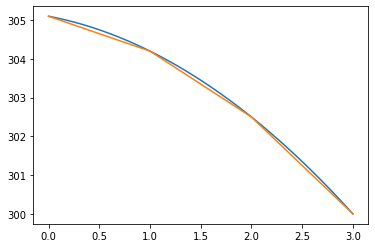

In [16]:
import matplotlib.pyplot as plt


x = np.linspace(0,3,50)
T = 300 + 4*(3**2 - x**2)/(2*5) + (3 - x)/2

plt.plot(x,T)

plt.plot([0,1,2,3], [T1,T2,T3,T4])